# Cálculo de índices de competitividad

## Obtenemos el DataSet

In [24]:
import pandas as pd

df = pd.read_csv('./data/NbaFullTeams.csv', delimiter = ';')

In [25]:
del(df['Unnamed: 0'])

In [26]:
df = df[~df['Lg'].str.contains('BAA')]

In [27]:
df['Wrate'] = (df['W']/df['G']).round(5)
#df[f'PTSrate{y}'] = (df['PTS']/df['PTS']).round(5)

In [28]:
df

,Season,Lg,W,L,Finish,Age,Ht.,Wt.,G,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Team,Year,Wrate
0,2022-23,NBA,57,25,1,27.4,6-6,222.0,82,19980.0,...,3717.0,2186,521.0,430.0,1095.0,1542,9671,BOS,2022,0.69512
1,2021-22,NBA,51,31,1,26.1,6-5,218.0,82,19905.0,...,3778.0,2036,591.0,478.0,1118.0,1521,9164,BOS,2021,0.62195
2,2020-21,NBA,36,36,4,25.1,6-5,220.0,72,17380.0,...,3186.0,1689,556.0,383.0,1012.0,1471,8109,BOS,2020,0.50000
3,2019-20,NBA,48,24,2,25.3,6-5,221.0,72,17430.0,...,3317.0,1655,595.0,406.0,995.0,1553,8183,BOS,2019,0.66667
4,2018-19,NBA,49,33,3,25.7,6-6,221.0,82,19780.0,...,3653.0,2155,706.0,435.0,1052.0,1670,9216,BOS,2018,0.59756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2006-07,NBA,39,43,4,26.4,6-6,214.0,82,19880.0,...,3537.0,1537,522.0,347.0,1187.0,1620,7833,NOH,2006,0.47561
1629,2005-06,NBA,38,44,4,26.3,6-6,212.0,82,19805.0,...,3297.0,1519,611.0,311.0,1095.0,1786,7611,NOH,2005,0.46341
1630,2004-05,NBA,18,64,5,27.5,6-6,219.0,82,19930.0,...,3300.0,1724,550.0,310.0,1217.0,1883,7252,NOH,2004,0.21951
1631,2003-04,NBA,41,41,3,30.3,6-6,219.0,82,19830.0,...,3509.0,1716,708.0,346.0,1228.0,1715,7529,NOH,2003,0.50000


In [29]:
teams = ['BOS', 'MIL','PHI', 'CLE', 'NJN', 'MIA', 'NYK', 'ATL', 'CHI', 'TOR', 'WAS','IND', 'ORL', 'CHA', 'DET','DEN', 
         'MEM', 'SAC', 'DAL', 'PHO', 'LAC', 'NJN', 'MIN', 'GSW', 'POR', 'UTA', 'OKC', 'LAL', 'SAS', 'HOU']
years = list(range(1949,2024))

dic_year = {}

for year in years:
    df_year = df.loc[df['Year'] == year]
    df_reset = df_year.reset_index(drop = True)
    #df_or = df_year.sort_values(by = 'Team')
    dic_year[year] = df_reset
 

In [30]:
for y in years:
    dic_year[y]['Wrate'+str(y)] = (dic_year[y]['W']/dic_year[y]['G']).round(5)
    dic_year[y]['PTSrate'+str(y)] = (dic_year[y]['PTS']/(dic_year[y]['PTS']).sum()).round(5)

In [31]:
dic_year[1951]

,Season,Lg,W,L,Finish,Age,Ht.,Wt.,G,MP,...,STL,BLK,TOV,PF,PTS,Team,Year,Wrate,Wrate1951,PTSrate1951
0,1951-52,NBA,39,27,2,25.0,6-4,191.0,66,NaN,...,NaN,NaN,NaN,1734,6027,BOS,1951,0.59091,0.59091,0.13577
1,1951-52,NBA,40,26,1,25.8,6-4,192.0,66,NaN,...,NaN,NaN,NaN,1970,5721,PHI,1951,0.60606,0.60606,0.12888
2,1951-52,NBA,37,29,3,25.5,6-3,197.0,66,NaN,...,NaN,NaN,NaN,1770,5609,NYK,1951,0.56061,0.56061,0.12636
3,1951-52,NBA,17,49,5,26.6,6-5,201.0,66,NaN,...,NaN,NaN,NaN,1848,4833,ATL,1951,0.25758,0.25758,0.10888
4,1951-52,NBA,29,37,4,26.5,6-4,198.0,66,NaN,...,NaN,NaN,NaN,1751,5151,DET,1951,0.43939,0.43939,0.11604
5,1951-52,NBA,41,25,1,28.9,6-4,194.0,66,NaN,...,NaN,NaN,NaN,1804,5689,SAC,1951,0.62121,0.62121,0.12816
6,1951-52,NBA,33,33,4,26.6,6-4,196.0,66,NaN,...,NaN,NaN,NaN,1806,5712,GSW,1951,0.50000,0.50000,0.12868
7,1951-52,NBA,40,26,2,25.8,6-4,201.0,66,NaN,...,NaN,NaN,NaN,1763,5648,LAL,1951,0.60606,0.60606,0.12724


## Creamos los índices

In [32]:
l = []
years = list(range(1949,2023))

for y in years: 
    l.append(dic_year[y]['Wrate'+str(y)])

wrate_df = pd.concat(l, axis = 1)

In [33]:
wrate_df

,Wrate1949,Wrate1950,Wrate1951,Wrate1952,Wrate1953,Wrate1954,Wrate1955,Wrate1956,Wrate1957,Wrate1958,...,Wrate2013,Wrate2014,Wrate2015,Wrate2016,Wrate2017,Wrate2018,Wrate2019,Wrate2020,Wrate2021,Wrate2022
0,0.32353,0.56522,0.59091,0.64789,0.58333,0.50000,0.54167,0.61111,0.68056,0.72222,...,0.30488,0.48780,0.58537,0.64634,0.67073,0.59756,0.66667,0.50000,0.62195,0.69512
1,0.79688,0.48485,0.60606,0.66197,0.58333,0.59722,0.48611,0.52778,0.56944,0.48611,...,0.18293,0.50000,0.40244,0.51220,0.53659,0.73171,0.76712,0.63889,0.62195,0.70732
2,0.58824,0.54545,0.56061,0.67143,0.61111,0.52778,0.48611,0.50000,0.48611,0.55556,...,0.23171,0.21951,0.12195,0.34146,0.63415,0.62195,0.58904,0.68056,0.62195,0.65854
3,0.45312,0.36765,0.25758,0.38028,0.29167,0.36111,0.45833,0.47222,0.56944,0.68056,...,0.40244,0.64634,0.69512,0.62195,0.60976,0.23171,0.29231,0.30556,0.53659,0.62195
4,0.58824,0.47059,0.43939,0.52174,0.55556,0.59722,0.51389,0.47222,0.45833,0.38889,...,0.65854,0.45122,0.58537,0.50000,0.53659,0.47561,0.60274,0.55556,0.64634,0.53659
5,0.75000,0.60294,0.62121,0.62857,0.61111,0.40278,0.43056,0.43056,0.45833,0.26389,...,0.45122,0.20732,0.39024,0.37805,0.35366,0.20732,0.31818,0.56944,0.45122,0.57317
6,0.38235,0.60606,0.50000,0.17391,0.40278,0.45833,0.62500,0.51389,0.51389,0.44444,...,0.46341,0.73171,0.58537,0.52439,0.29268,0.35366,0.29851,0.56944,0.52439,0.50000
7,0.75000,0.64706,0.60606,0.68571,0.63889,0.55556,0.45833,0.47222,0.26389,0.45833,...,0.58537,0.60976,0.51220,0.50000,0.32927,0.26829,0.33846,0.43056,0.56098,0.48780
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.58537,0.59756,0.68293,0.62195,0.71951,0.70732,0.73611,0.37500,0.58537,0.50000
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53659,0.56098,0.50000,0.59756,0.52439,0.39024,0.34722,0.47222,0.42683,0.42683


In [34]:
l = []
years = list(range(1949,2023))

for y in years: 
    l.append(dic_year[y]['PTSrate'+str(y)])

ptsrate_df = pd.concat(l, axis = 1)

In [35]:
ptsrate_df

,PTSrate1949,PTSrate1950,PTSrate1951,PTSrate1952,PTSrate1953,PTSrate1954,PTSrate1955,PTSrate1956,PTSrate1957,PTSrate1958,...,PTSrate2013,PTSrate2014,PTSrate2015,PTSrate2016,PTSrate2017,PTSrate2018,PTSrate2019,PTSrate2020,PTSrate2021,PTSrate2022
0,0.12505,0.12868,0.13577,0.13356,0.13758,0.13627,0.13380,0.13244,0.12888,0.13439,...,0.03176,0.03378,0.03432,0.03410,0.03261,0.03369,0.03456,0.03349,0.03368,0.03428
1,0.12526,0.12429,0.12888,0.12979,0.13100,0.12231,0.12230,0.12505,0.12570,0.13065,...,0.03151,0.03261,0.03216,0.03271,0.03338,0.03541,0.03659,0.03572,0.03480,0.03399
2,0.12662,0.12398,0.12636,0.12774,0.12392,0.12444,0.12644,0.12644,0.13135,0.12740,...,0.03282,0.03065,0.03163,0.03234,0.03442,0.03452,0.03414,0.03379,0.03313,0.03349
3,0.12258,0.12538,0.10888,0.11502,0.10976,0.11735,0.12190,0.12358,0.12598,0.12559,...,0.03241,0.03437,0.03387,0.03483,0.03475,0.03132,0.02934,0.03088,0.03248,0.03263
4,0.12436,0.12521,0.11604,0.11933,0.12185,0.12409,0.11911,0.12092,0.12349,0.12134,...,0.03372,0.03156,0.03248,0.03257,0.03242,0.03168,0.03454,0.03214,0.03316,0.03182
5,0.12925,0.12595,0.12816,0.12898,0.12510,0.12190,0.12097,0.11726,0.11921,0.11903,...,0.03253,0.03063,0.03193,0.03294,0.03275,0.03134,0.02949,0.03183,0.03209,0.03372
6,0.11497,0.12328,0.12868,0.11811,0.12270,0.12521,0.13016,0.12600,0.12222,0.11925,...,0.03333,0.03418,0.03339,0.03257,0.03240,0.03397,0.03162,0.03381,0.03433,0.03442
7,0.13190,0.12324,0.12724,0.12748,0.12810,0.12843,0.12532,0.12832,0.12318,0.12236,...,0.03091,0.03359,0.03300,0.03247,0.03227,0.03145,0.02933,0.03291,0.03363,0.03288
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03342,0.03466,0.03334,0.03373,0.03500,0.03430,0.03428,0.03309,0.03296,0.03280
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03322,0.03284,0.03379,0.03447,0.03342,0.03418,0.03479,0.03469,0.03273,0.03289


In [36]:
import math as m

l = []

for y in years:
    x = wrate_df['Wrate'+str(y)].loc[wrate_df['Wrate'+str(y)].notnull()]
    l.append(m.sqrt(((x-0.5)**2).sum()/x.count()))

In [37]:
sigma = pd.DataFrame(l, index=years, columns=['Sigma'])

In [38]:
import math as m

l1 = []

for y in years:
    x = ptsrate_df['PTSrate'+str(y)].loc[ptsrate_df['PTSrate'+str(y)].notnull()]
    l1.append(100*x.count()*(x**2).sum())

In [39]:
hicb = pd.DataFrame(l1, index=years, columns=['HICB'])

In [40]:
hicb.sort_values(by = 'HICB')

,HICB
1950,100.019787
1963,100.041419
1960,100.054763
2022,100.058985
1964,100.065747
...,...
1975,100.338678
1974,100.347601
1953,100.364010
1951,100.403263


In [41]:
sigma.sort_values(by = 'Sigma', ascending = True)

,Sigma
1956,0.050556
1955,0.057266
1954,0.081579
1950,0.092468
1976,0.096026
...,...
1952,0.176654
1972,0.181333
1949,0.185705
1997,0.186137


## Mostramos de forma gráfica los valores

In [42]:
import matplotlib.pyplot as plt

l = ['1979-80', '1989-90', '1999-00', '2004-05', '2009-10', '2014-15', '2021-22']

def mostrar_estadistica_(stat):
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.grid(True)
    ax.set_title('ÍNDICE DE COMPETITIVIDAD')
    ax.set_xticks(range(1940, 2026, 5)) 
    
    ax.plot(stat)

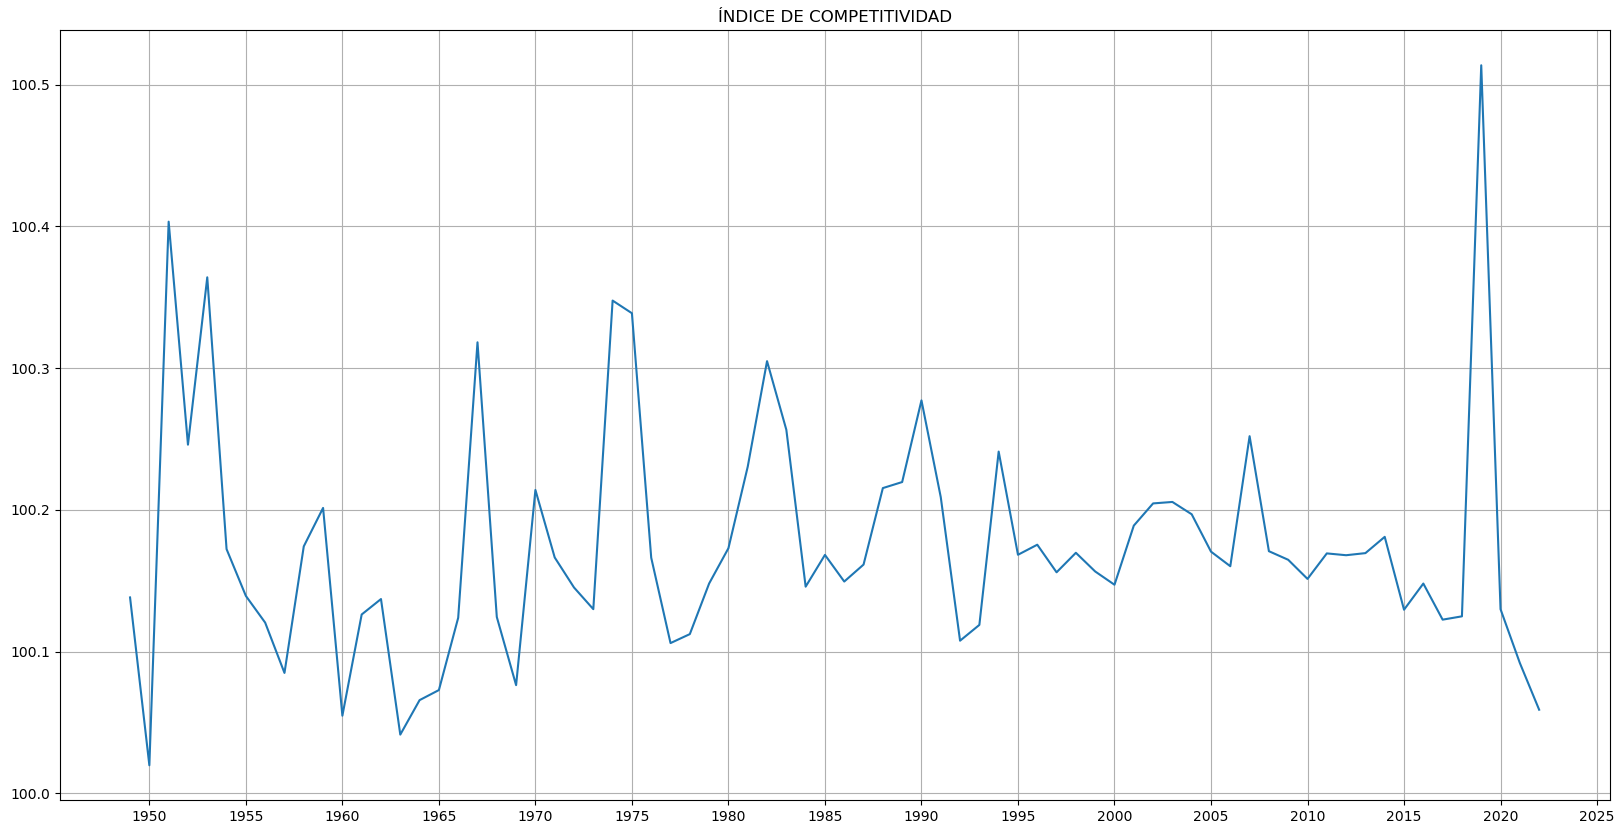

In [43]:
mostrar_estadistica_(hicb)

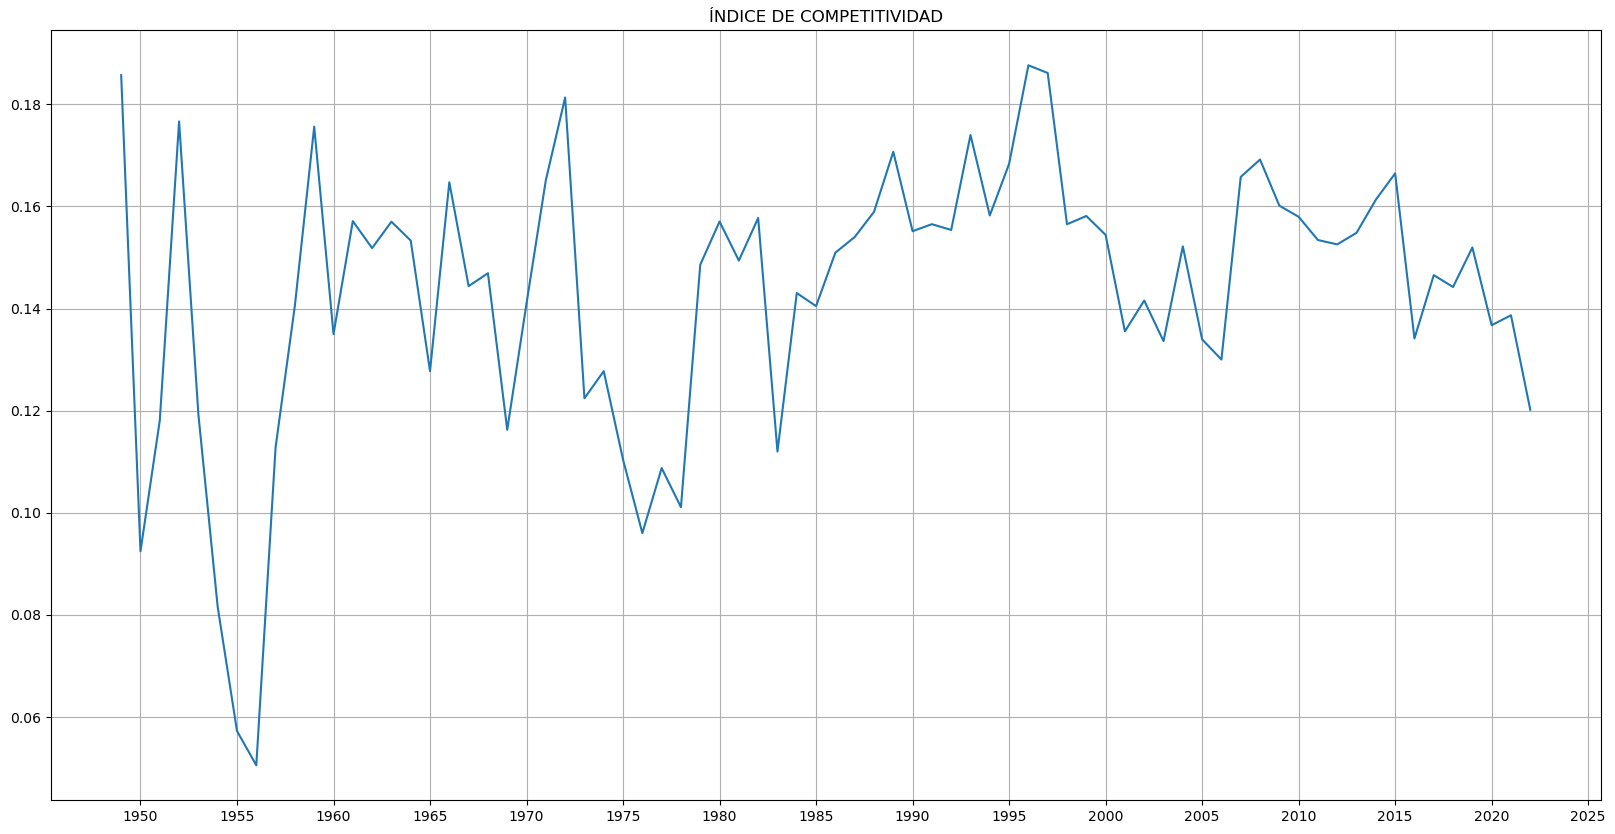

In [44]:
mostrar_estadistica_(sigma)